In [6]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
from random import seed
from random import random
from datetime import datetime
from numba import jit


#semilla para num aleatorios
now = datetime.now()
seed(now.microsecond)


@jit(nopython=False)
def norma(x,N):
    suma=0
    for i in range(N-1):
        suma=suma+(x[i]*x[i].conjugate()).real
    return suma
@jit(nopython=False)

def calc(phi,beta,alpha,chi,v,s,M):   ##función que calcula la parte principal
    for j in range (M-1):
        beta[M-2-j]=(4*1j*phi[M-1-j]/s-beta[M-1-j])/(-2+2*1j/s-v[M-1-j]+alpha[M-1-j])
        
    for j in range (M-1):
        chi[j+1]=alpha[j]*chi[j]+beta[j]
    
    for j in range(M):
        phi[j]=chi[j]-phi[j]

    return(phi,beta,chi)


def main(niteraciones,N,lambd):
    
    #inicializamos las variables

    nc=N/4
    M=N-1
    alpha=np.zeros(M,dtype=complex)
    beta=np.zeros((M),dtype=complex)
    chi=np.zeros((M),dtype=complex)
    phi=np.zeros((N),dtype=complex)
    k0=2*math.pi*nc/N+0*1j
    s=0.25*k0*k0+0*1j
    v=np.zeros(N,dtype=complex)
    
    pd=np.zeros(niteraciones) ###probabilidad derecha para estudiar coeficiente de transmisión
   
    
    for j in range(N-1):
        phi[j]=cmath.exp(1j*k0*j)*cmath.exp((-8*(4*j-N)**2)/(N*N))
    

    phi[0]=0
    phi[N-1]=0

    norma0=math.sqrt(norma(phi,N))

    for j in range(N-1):
        phi[j]=phi[j]/norma0

   

    for j in range(N):
        if((j>=2*N/5) & (j<=3*N/5)):
            v[j]=lambd*k0**2


    
    g=open("norma.txt","w")
       
    





    for j in range(M-1):        ### inicialización de alpha
        alpha[M-2-j]=-1/(-2+2*1j/s-v[M-1-j]+alpha[M-1-j])

    maximo=False
    n=0
    while maximo==False :  
        
        aux=calc(phi,beta,alpha,chi,v,s,M)          ##### para calcular la evolución se hace con una función
        phi=aux[0]
        beta=aux[1]
        chi=aux[2]
        

        for j in range(N//5):
            pd[n]=pd[n]+((phi[4*N//5+j]*phi[4*N//5+j].conjugate()).real)
     
        
        # print(pd[n])   
        if(n>0):                                       ### codición que encuentra el máximo de la función 
            if((pd[n]<pd[n-1]) and pd[n-1]>0.00001):   ### la segunda condicion es un poco arbitraria pero se utiliza para saltarse las posibles 
                maximo=True                            ### fluctuaciones en valores cercanos a 0

        
        norma1=math.sqrt(norma(phi,N))      ###comprobación de que se conserva la norma
        print(norma1,file=g)


        n=n+1
        if(n==niteraciones):        ### condición que para el programa en niteraciones por si no se encuentra el máximo
            maximo=True

    

    
    g.close()

    
    p=random()
    
    if(p<pd[n-2]):          ### se hace la comprobación y se comprueba si se ha detectado
        return(1,pd[n-2])
    else:
        return(0,pd[n-2])


Primer apartado

In [ ]:
niteraciones=1000
N=200
lambd=0.5

error=0
ki=np.zeros(15)
pdi=np.zeros(15)
for j in range(15):
    suma=0
    promedio=0
    for i in range(1000):
        aux=main(niteraciones,N,lambd)
        suma=suma+aux[0]

        promedio=promedio+aux[1]
    ki[j]=suma/1000
    pdi[j]=promedio/1000

desv=0
promediomonte=np.mean(ki)
for j in range(15):
    desv=desv+(ki[j]-promediomonte)**2

desv=desv/15
error=math.sqrt(desv/15)
print(promediomonte,error,promedio/1000)

0.7756666666666667 0.004075582212441604 0.7728355748609297


Segundo apartado

In [ ]:
niteraciones=2000
N=[200,500,1000,1500,2000]
lambd=0.5
ki=np.zeros(5)
# ki=np.zeros(1000)
for j in range(5):
    suma=0
    for i in range(1000):
        aux2=main(niteraciones,N[j],lambd)
        suma=suma+aux2[0]
    ki[j]=suma/1000
print(ki)

[0.807 0.772 0.779 0.792 0.788]


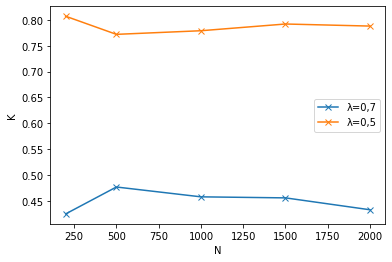

In [13]:
N=[200,500,1000,1500,2000]
ki=[0.425, 0.477, 0.458, 0.456, 0.433]
ki2=[0.807, 0.772, 0.779, 0.792, 0.788]
fig, ax = plt.subplots()
ax.plot(N,ki,'-x', label='\u03BB=0,7')
ax.plot(N,ki2,'-x',label='\u03BB=0,5')
ax.set_xlabel('N')  # Add an x-label to the axes.
ax.set_ylabel('K')  # Add a y-label to the axes.
ax.legend()

Tercer apartado

In [17]:
niteraciones=500
N=500
lambd=[0.1,0.3,0.5,0.7,1,2.5,5,7.5,10]
ki=np.zeros(9)
# ki=np.zeros(1000)
for j in range(9):
    suma=0
    for i in range(1000):
        aux2=main(niteraciones,N,lambd[j])
        suma=suma+aux2[0]
    ki[j]=suma/1000
print(ki)

[0.992 0.925 0.763 0.454 0.    0.    0.    0.    0.   ]


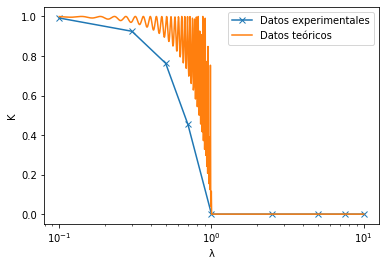

In [49]:
lambd=[0.1,0.3,0.5,0.7,1,2.5,5,7.5,10]
ki=[0.992, 0.925, 0.763, 0.454, 0,    0,    0,    0,   0   ]
num=500
x1=np.logspace(-1,1,2*num)
k1=np.zeros((2*num))
for i in range(num):
    k1[i]=(1+(x1[i]**2)*((math.sin(math.sqrt(math.pi*(1-x1[i])/2)*500/5))**2)/(4*(1-x1[i])))**(-1)
    # k2[i]=(1+(x2[i]**2)*((math.sinh(math.sqrt(math.pi*(x2[i]-1)/2)*500/5))**2)/(4*(x2[i]-1)))**(-1)
fig, ax = plt.subplots()
ax.plot(lambd,ki,'-x', label='Datos experimentales')
ax.plot(x1,k1,'-', label='Datos teóricos')
ax.set_xlabel('\u03BB')  # Add an x-label to the axes.
ax.set_ylabel('K')  # Add a y-label to the axes.
ax.legend()
ax.set_xscale('log')

In [7]:
%prun main(500,500,0.7)

         1199285 function calls (1142470 primitive calls) in 1.180 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1375    0.204    0.000    0.224    0.000 ffi.py:149(__call__)
     2942    0.062    0.000    0.062    0.000 {built-in method __new__ of type object at 0x00007FFA9032B920}
        1    0.050    0.050    1.181    1.181 2192924980.py:36(main)
    50000    0.045    0.000    0.045    0.000 {method 'conjugate' of 'numpy.generic' objects}
      137    0.035    0.000    0.035    0.000 {built-in method io.open_code}
      681    0.031    0.000    0.031    0.000 {built-in method nt.stat}
31358/5394    0.030    0.000    0.044    0.000 ir.py:313(_rec_list_vars)
   209340    0.026    0.000    0.037    0.000 {built-in method builtins.isinstance}
       20    0.014    0.001    0.014    0.001 {built-in method _imp.create_dynamic}
      137    0.014    0.000    0.014    0.000 {built-in method marshal.loads}
18992/9425    0